# **AP155 Lab Assignment** 
## Module 1: Integrals and Derivatives

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 5 are worth 20, 20, 10, 30, and 20 points, respectively).

_Due Date_: **5PM of November 9 (Wed)**



### Student Information 

_Full Name (Last Name, First Name)_: Salinas, Jose Enrico\
_Student No._: 201808184\
_Section_: THX2

In [1]:
# !pip install pytz
from datetime import datetime
from pytz import timezone
print("Last run: ", datetime.now(timezone("Asia/Manila")).strftime("%m/%d/%Y, %H:%M:%S"))

Last run:  11/09/2022, 15:57:01


### Submission Information



**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Jose Enrico Salinas

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/20
* Problem 2 - XX/20
* Problem 3 - XX/10
* Problem 4 - XX/30
* Problem 5 - XX/20

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### PROBLEM 1 (20 pts.) 
**Integration using the trapezoidal rule and Simpson's rule**

Calculate the integral of the function $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Do the numerical calculation using the trapezoidal rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

2. What are the percentage errors of your answers in (1)? *(2 pts.)*

3. Repeat the calculation using Simpson's rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(8 pts.;  4 pts. for the code & 4 pts. for the discussion text)*

4. What are the percentage errors of your answers in (3)? How do they compare with the results from (1) for the same number of slices? *(2 pts.)*

In [3]:
from numpy import arange, sum

We first define a function to do the naive trapezoidal integration which takes the following arguments:

`f` - the integrand \
`a` - lower integration bound \
`b` - upper integration bound \
`n` - integer number of slices

The function finds the width of each slice `h` and the index `k ` and estimates the integral using Newman Eq 5.3.

In [4]:
def integrate_trapezoidal(f, a, b, n):
  h = (b - a)/n
  k = arange(1, n)

  i = (f(a)/2 + f(b)/2 + sum(f(a + k*h)))*h
  return i

Afterwhich, we simply define the polynomial and input it into our function with 10, 100, and 1000 slices.

In [5]:
f = lambda x: 2*x**4 + 3*x**2 + 4*x + 5
f_i = lambda x: 2/5*x**5 + x**3 + 2*x + 5*x

trapezoidal_e1 = integrate_trapezoidal(f, 0, 5, 10)
trapezoidal_e2 = integrate_trapezoidal(f, 0, 5, 100)
trapezoidal_e3 = integrate_trapezoidal(f, 0, 5, 1000)

print(trapezoidal_e1)
print(trapezoidal_e2)
print(trapezoidal_e3)

1471.4375
1450.2145812500003
1450.0021458331255


We implement a similar method for Simpson's rule. The indices are split into odd and even indices using `numpy.arange` and the integral is estimated using Newman Eq 5.10.

In [6]:
def integrate_simpsons(f, a, b, n):
  if n%2 != 0:
    raise ValueError("Number of slices must be even")

  h = (b-a)/n
  k_odd = arange(1, n, 2)
  k_even = arange(2, n, 2)

  i = (f(a) + f(b) + 4*np.sum(f(a + k_odd*h)) + 2*np.sum(f(a + k_even*h)))*h/3
  return i

In [7]:
simpsons_e1 = integrate_simpsons(f, 0, 5, 10)
simpsons_e2 = integrate_simpsons(f, 0, 5, 100)
simpsons_e3 = integrate_simpsons(f, 0, 5, 1000)

print(simpsons_e1)
print(simpsons_e2)
print(simpsons_e3)

1450.0833333333333
1450.0000083333337
1450.0000000008338


### PROBLEM 2 (20 pts.)

**Integration using the adaptive trapezoidal rule method and Romberg integration**

Calculate the integral $ I = \int_0^1 \sin^2 \sqrt{100x} \mbox{d}x $.

1. Do the numerical calculation using the adaptive trapezoidal rule method to an approximate accuracy of $\epsilon = 10^{-6}$. Start with one single integration slice and work up from there to two, four, eight, and so forth. Save and print out the number of slices, its estimate of the integral, and its estimate of the error on the integral, for each value of the number of slices $N$, until the target accuracy is reached. *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

2. Repeat the calculation using the Romberg integration technique. Save and print out the same variables as in (1). *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

3. Compare the results from both calculations by creating a plot of error estimates vs. $N$. Annotate your chart completely (include proper axis labels and legend). Describe how the trends for the two techniques compare. *(4 pts.; 2 pts. for the chart & 2 pts. for the discussion text)*

In [8]:
from numpy import arange, abs, sum, square, sqrt, sin, nan, inf

We define a function that implements the adaptive trapezoidal integration recursively. The function computes the integral using the naive trapezoidal integration. If the error metric greater than the maximum error, the function doubles the number of slices and checks for the error again until it is acceptable.

In [9]:
# For use in App Physics 155 Problem Set
# Remove after use
errors_trapezoidal = []
estimates_trapezoidal = []

def adaptive_trapezoidal(f, a, b, max_error, slices=1, prev=None):
  # Calculate n=1
  if prev is None:
    prev = integrate_trapezoidal(f, a, b, slices)
  
  # Perform naive trapezoidal integration
  # for n slices
  h = (b - a)/slices
  k = arange(1, slices, 2)
  next = prev/2 + sum(f(a + k*h))*h
  error = abs(next - prev)/3

  # Terminate integration if error is
  # below the tolerance
  if (error < max_error):
    return next

  # For use in App Physics 155 Problem Set
  # Remove after use
  errors_trapezoidal.append(error)
  estimates_trapezoidal.append(next)  
  print("Slices: {} | Error: {} | Estimate: {}".format(slices, error, next))

  # Double the number of slices
  return adaptive_trapezoidal(f, a, b, max_error, slices=slices*2, prev=next)

We define the function and then integrate until error is below `1e-6`.

In [10]:
f = lambda x: square(sin(np.sqrt(100*x)))
adaptive_trapezoidal(f, 0, 1, 1e-6)

Slices: 1 | Error: 0.024663247424441998 | Estimate: 0.073989742273326
Slices: 2 | Error: 0.07141576479882854 | Estimate: 0.2882370366698116
Slices: 4 | Error: 0.06851612616172943 | Estimate: 0.4937854151549999
Slices: 8 | Error: 0.03334556148697245 | Estimate: 0.39374873069408256
Slices: 16 | Error: 0.010576759902860519 | Estimate: 0.4254790104026641
Slices: 32 | Error: 0.006874491979588134 | Estimate: 0.4461024863414285
Slices: 64 | Error: 0.0022181183836422202 | Estimate: 0.4527568414923552
Slices: 128 | Error: 0.0006712060063122083 | Estimate: 0.4547704595112918
Slices: 256 | Error: 0.00021726150373135855 | Estimate: 0.4554222440224859
Slices: 512 | Error: 7.848147126687799e-05 | Estimate: 0.4556576884362865
Slices: 1024 | Error: 3.166802948162406e-05 | Estimate: 0.4557526925247314
Slices: 2048 | Error: 1.3938624356779616e-05 | Estimate: 0.4557945083978017
Slices: 4096 | Error: 6.495326182298644e-06 | Estimate: 0.4558139943763486
Slices: 8192 | Error: 3.129157941557844e-06 | Estimat

0.45583026691459305

We define the function similarly for Romberg integration. We find the first estimate using trapezoidal integration for `i=1, m=1` and store this in `next`. We then go to the next interation `i=2, m=1` and do the same. We then calculate succeeding estimators using Newman Eq 5.51 until `error` is less than the `max_error`.

In [11]:
# For use in App Physics 155 Problem Set
# Remove after use
errors_romberg = []
estimates_romberg = []

def integrate_romberg(f, a, b, max_error, depth=0, prev=[]):
  slices = 2**depth
  error = np.inf
  estimate = np.nan
  next = [integrate_trapezoidal(f, a, b, slices)]

  for m in range(depth):
    error = (next[m] - prev[m])/(4**(m + 1) - 1)
    estimate = next[m] + error
    next.append(estimate)
    
    if abs(error) < max_error:
      print("Slices: {} | Error: {} | Estimate: {}".format(slices, error, estimate))
      return estimate
      
  # For use in App Physics 155 Problem Set
  # Remove after use
  errors_romberg.append(error)
  estimates_romberg.append(estimate)
  
  print("Slices: {} | Error: {} | Estimate: {}".format(slices, error, estimate))
  return integrate_romberg(f, a, b, max_error, depth=depth+1, prev=next)

In [12]:
integrate_romberg(f, 0, 1, 1e-6)

Slices: 1 | Error: inf | Estimate: nan
Slices: 2 | Error: 0.05908414108660753 | Estimate: 0.38431604889308213
Slices: 4 | Error: 0.012687807742391222 | Estimate: 0.5873209727713417
Slices: 8 | Error: -0.003724173608029151 | Estimate: 0.34897386185747603
Slices: 16 | Error: 0.00037824180802092456 | Estimate: 0.4458037647108327
Slices: 32 | Error: 9.739968281508006e-06 | Estimate: 0.4557774922310969
Slices: 64 | Error: 4.104097345009377e-07 | Estimate: 0.4558324178214101


0.4558324178214101

To compare adaptive trapezoidal integration and Romberg integration, we can plot the error metric for the number of slices used. The absolute error versus the number of slices ($\log_2$) is shown below

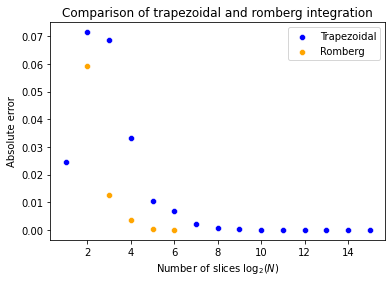

In [13]:
x_trapezoidal = np.arange(0, len(errors_trapezoidal)) + 1
x_romberg = np.arange(0, len(errors_romberg)) + 1
y_trapezoidal = np.abs(np.array(errors_trapezoidal))
y_romberg = np.abs(np.array(errors_romberg))

fig, ax = plt.subplots()
sns.scatterplot(x=x_trapezoidal, y=y_trapezoidal, color="blue", label="Trapezoidal", ax=ax)
sns.scatterplot(x=x_romberg, y=y_romberg, color="orange", label="Romberg", ax=ax)
ax.set_title("Comparison of trapezoidal and romberg integration")
ax.set_xlabel("Number of slices $\log_2(N)$")
ax.set_ylabel("Absolute error")
ax.legend(loc="upper right")

We see that Romberg integration converges more quickly to the the desired error at `N=64` compared to trapezoidal integration which converges at `N=16384`. This is expected since Romberg integration is a higher order estimator as `N` increases while trapezoidal integration is a second order estimator at all values of `N`.

### PROBLEM 3 (10 pts.)

**Integration using Gaussian quadrature**

Calculate the integral from Problem 1 using the Gaussian quadrature method: $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Define the function $\tt gaussxw$ from Appendix E of the Newman text (and run the cell). *(2 pts.)*

2. Calculate the integral using the $\tt gaussxw$ function in (1) and number of slices $N = 3$. Describe each step in the calculation clearly and concisely. *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

The function `gaussxw` estimates the weights and points for a required number of points. The function `gaussxwab` fits these weights to some integration domain $[a, b]$. Lastly `integrate_gaussian` integrates the function similarly to previous definitions. The function simply gets the fitted weights and points using `gaussxwab` and integrates using Gaussian quadrature (Newman Appendix E).

In [14]:
from numpy import ones, copy, cos, tan, pi, linspace, sum

def gaussxw(N):
  # Initial apprxoimation to roots of the Legrendre polynomial
  a = linspace(3, 4*N-1, N)/(4*N + 2)
  x = cos(pi*a+1/(8*N*N*(tan(a))))

  #Find roots using Newton's method
  epsilon = 1e-15
  delta = 1.0
  while delta > epsilon:
    p0 = ones(N, float)
    p1 = copy(x)
    for k in range(1, N):
      p0, p1 = p1, ((2*k + 1)*x*p1 - k*p0)/(k + 1)
    dp = (N + 1)*(p0 - x*p1)/(1 - x*x)
    dx = p1/dp
    x -= dx
    delta = max(abs(dx))

  # Calculate the weights
  w = 2*(N + 1)*(N + 1)/(N*N*(1 - x*x)*dp*dp)

  return x, w

def gaussxwab(n, a, b):
  x, w = gaussxw(n)
  xab = (b - a)/2*x + (b + a)/2
  wab = (b - a)/2*w

  return xab, wab

def integrate_gaussian(f, a, b, n):
  xab, wab = gaussxwab(n, a, b)
  estimate = sum(wab*f(xab))

  return estimate

We simply define the polynomial and then call the previously defined function to get our estimate.

In [15]:
f = lambda x: 2*x**4 + 3*x**2 + 4*x + 5

gaussian_n3 = integrate_gaussian(f, 0, 5, 3)
print(gaussian_n3)

1450.000000000002


### PROBLEM 4 (30 pts.)

**Physics Application: Anharmonic Oscillator**

_Refer to Exercise 5.10 of the Newman text._ Consider an anharmonic oscillator with potential $V(x)$ symmetric about $x = 0$. Let us set our anharmonic oscillator going with amplitude $a$. That is, at $t = 0$ we release it from rest at position $x = a$ and it swings back towards the origin. Then at $t = 0$ we have $dx/dt = 0$ and the equation for its total energy becomes $E = V(a)$, i.e., the total energy of the particle is given in terms of the amplitude.

When the particle reaches the origin for the first time, it has gone through one quarter of a period of the oscillator. The period $T$ is given by: $$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a)-V(x)}}. $$

1. Suppose the potential is $V(x) = x^4$ and the mass of the particle is $m = 1$. Write a Python function that calculates the period of the oscillator for given amplitude a using Gaussian quadrature with $N = 20$ points. Describe each step clearly and concisely. *(16 pts.; 8 pts. for the code & 8 pts. for the discussion text)*

2. Use your function to make a graph of the period for amplitudes ranging from $a = 0$ to $a = 2$. Describe the behavior you find and explain these results clearly and concisely. *(14 pts.; 7 pts. for the plot & 7 pts. for the discussion text)*

In [16]:
from numpy import vectorize

We define a function that finds the period $T$ using Gaussian quadrature for some given amplitude.

In [17]:
def get_period(a):
  f = lambda x: sqrt(8)/sqrt(a**4 - x**4)
  t = integrate_gaussian(f, 0, a, 20)

  return t

We simply call the function for an array of $a$ in $[0,2]$. The function `get_period` was vectorized to simplify the code.

In [18]:
vect = vectorize(get_period)

x = arange(1e-2, 2, 1e-2)
y = vect(x)

A plot of $T$ with varying $a$ is shown below. We find that $T$ decays non-linearly and rapidly as $a$ increases. This is expected since the particle will have a maximum velocity as its maximum energy increases. Since the maximum energy is $E=a^4$, the maximum velocity increases rapidly as $a$ increases. It takes less time for the particle to complete an oscillation as a result.

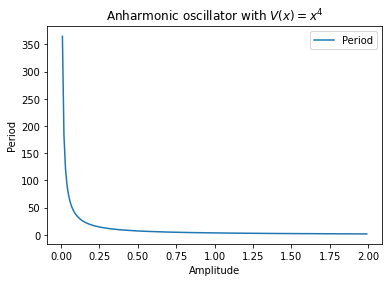

In [19]:
fig, ax = plt.subplots()
sns.lineplot(x=x, y=y, label="Period", ax=ax)
ax.set_title("Anharmonic oscillator with $V(x)=x^4$")
ax.set_xlabel("Amplitude")
ax.set_ylabel("Period")
ax.legend(loc="upper right")

### PROBLEM 5 (20 pts.)

**Differentiation using central difference**

1. Calculate the derivative of the function $1 + \frac{1}{2} \tanh 2x$ in the range $-2 \le x \le 2$ using central difference. Describe each step of the calculation clearly and concisely. *(10 pts.; 5 pts. for the code & 5 pts. for the discussion text)*

2. Calculate an analytic formula for the derivative and make a graph with your numerical result and the analytic answer on the same plot. Plot the exact answer as lines and the numerical one as dots. Describe how the two results compare. *(10 pts.; 5 pts. for the code & 5 pts. for the discussion text)*

We simply define a function to implement central difference from equation 5.95 of Newman. The width $h$ was chosen from Newman's minimum error.

In [20]:
def differentiate_central(f, a, b, h=10e-5):
  x = np.arange(a, b + h/2, h/2)
  dx = (f(x + h/2) - f(x - h/2))/h

  return dx

We then define the function and its analytic derivative and compute each value of $\frac{df}{dx}$ on the interval $[-2, 2]$ every $5\times10^{-2}$ increases.

In [21]:
f = lambda x: 1 + np.tanh(2*x)/2
df = lambda x: 1/np.cosh(2*x)**2

x = np.arange(-2, 2 + 10e-5/2, 10e-5/2)
analytic = df(x)
numerical = differentiate_central(f, -2, 2)

Lastly, we can plot the analytic and numerically computed results. The values are approximately equal. A second plot which is zoomed in on the interval $[-0.5005, -0.5]$ shows that there is negligible error.

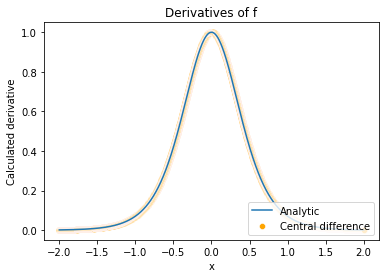

In [22]:
fig, ax = plt.subplots()
sns.lineplot(x=x, y=analytic, label="Analytic", ax=ax)
sns.scatterplot(x=x, y=numerical, color="orange", label="Central difference", ax=ax)
ax.set_title("Derivatives of f")
ax.set_xlabel("x")
# ax.set_xlim([-0.5-5*10e-5, -0.5+5*10e-5])
ax.set_ylabel("Calculated derivative")
# ax.set_ylim([0.42-10e-4, 0.42+10e-4])
ax.legend(loc="lower right")

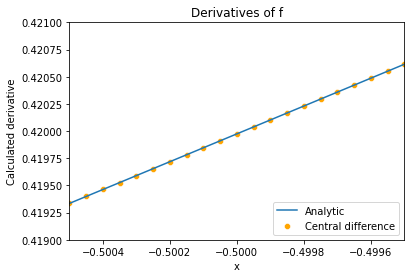

In [23]:
fig, ax = plt.subplots()
sns.lineplot(x=x, y=analytic, label="Analytic", ax=ax)
sns.scatterplot(x=x, y=numerical, color="orange", label="Central difference", ax=ax)
ax.set_title("Derivatives of f")
ax.set_xlabel("x")
ax.set_xlim([-0.5-5*10e-5, -0.5+5*10e-5])
ax.set_ylabel("Calculated derivative")
ax.set_ylim([0.42-10e-4, 0.42+10e-4])
ax.legend(loc="lower right")